In [98]:
#importing packages
%matplotlib inline
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost
from sklearn.tree import export_graphviz

plt.style.use('ggplot')

print("Imported packages successfully!")

Imported packages successfully!


In [99]:
df = pd.read_csv(r"C:\Users\ritz\Downloads\creditcarddata\creditcard.csv")

In [100]:
#shape
print('This data frame has {} rows and {} columns.'.format(df.shape[0], df.shape[1]))

This data frame has 284807 rows and 31 columns.


In [101]:
#peek at data
df.sample(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
170211,120073.0,0.042,1.339,1.142,4.349,0.921,1.040,0.693,-6.144e-04,-1.770,...,0.141,0.907,-0.242,-0.366,-0.538,0.460,0.311,0.034,10.60,0
256821,157881.0,-1.133,-0.878,-3.364,1.455,-1.192,0.265,4.156,-2.102e-01,-1.009,...,1.022,1.607,1.985,0.557,-0.783,-0.407,0.176,0.408,847.67,0
104592,69138.0,1.227,-0.081,0.098,0.388,-0.314,-0.543,-0.036,-4.823e-02,0.402,...,-0.400,-1.371,0.081,-0.508,0.136,0.155,-0.058,0.016,49.98,0
239262,150025.0,-1.166,1.063,-1.462,-1.012,0.620,-0.811,0.148,7.466e-01,0.276,...,-0.164,-0.528,0.030,0.004,0.243,-0.098,-0.045,-0.080,1.00,0
195933,131286.0,2.107,-0.764,-1.145,-0.543,-0.914,-1.048,-0.890,-1.414e-01,0.155,...,0.236,0.703,0.074,-0.222,-0.157,-0.081,0.021,-0.010,39.99,0
192264,129612.0,-0.609,-1.627,-2.036,-1.055,1.423,-1.778,1.657,-6.948e-01,-1.223,...,0.280,0.841,0.890,0.734,-1.203,0.604,0.192,0.206,282.39,0
86708,61361.0,-0.409,0.857,1.098,-0.158,0.221,-0.046,0.389,3.581e-01,-0.301,...,-0.230,-0.705,-0.004,-0.421,-0.294,0.112,0.242,0.077,6.88,0
227116,144940.0,2.051,-0.124,-1.442,0.187,0.097,-0.883,0.091,-1.899e-01,0.491,...,0.266,0.857,-0.043,-0.322,0.251,-0.105,-0.030,-0.074,2.69,0
262424,160467.0,2.058,-0.484,-0.633,0.252,-0.341,0.072,-0.701,4.051e-02,1.357,...,0.095,0.513,0.046,-1.009,-0.160,0.637,-0.018,-0.059,6.89,0
127776,78464.0,1.314,-0.564,0.073,-0.741,-0.779,-0.608,-0.353,-1.495e-01,-1.230,...,-0.330,-0.567,-0.045,0.057,0.287,1.038,-0.075,-0.001,45.47,0


In [102]:
#showing information like name of column, non-null values and data-type etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**Visualizing and Preprocessing Data**

In [103]:
#finding if there are any missing values in any feild
df.isnull()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284803,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284804,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284805,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [104]:
#outputs unique values of target variable i.e. class. Where 0 means non-fraudulent and 1 means fraudulent 
df['Class'].unique()

array([0, 1], dtype=int64)

In [105]:
#numerical summary -> only non-anonymized columns are of interest, which are- time, amount
pd.set_option('precision', 3)
df.loc[:, ['Time', 'Amount']].describe()

,Time,Amount
count,284807.000,284807.000
mean,94813.860,88.350
std,47488.146,250.120
min,0.000,0.000
25%,54201.500,5.600
50%,84692.000,22.000
75%,139320.500,77.165
max,172792.000,25691.160


<AxesSubplot:title={'center':'Distribution of Time Feature'}, xlabel='Time', ylabel='Density'>

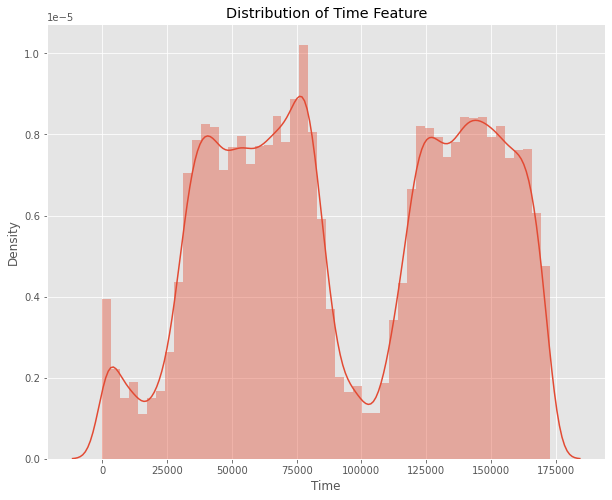

In [106]:
#visualizations of time and amount
plt.figure(figsize=(10,8))
plt.title('Distribution of Time Feature')
sns.distplot(df.Time)

<AxesSubplot:title={'center':'Distribution of Monetary Value Feature'}, xlabel='Amount', ylabel='Density'>

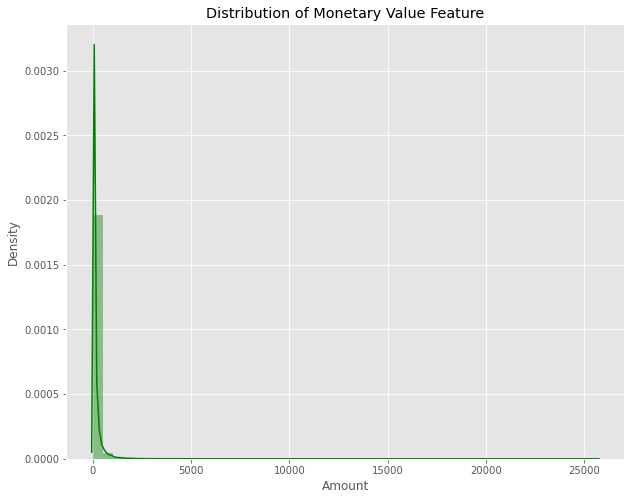

In [107]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Monetary Value Feature')
sns.distplot(df.Amount, color='g')

Around 88 dollars is the mean of all credit card transactions in this data set. The biggest transaction had a monetary value of around 25,691 dollars.

In [108]:
#fraud vs. normal transactions 
counts = df.Class.value_counts()
normal = counts[0]
fraudulent = counts[1]
perc_normal = (normal/(normal+fraudulent))*100
perc_fraudulent = (fraudulent/(normal+fraudulent))*100
print('There were {} non-fraudulent transactions ({:.3f}%) and {} fraudulent transactions ({:.3f}%).'.format(normal, perc_normal, fraudulent, perc_fraudulent))

There were 284315 non-fraudulent transactions (99.827%) and 492 fraudulent transactions (0.173%).


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

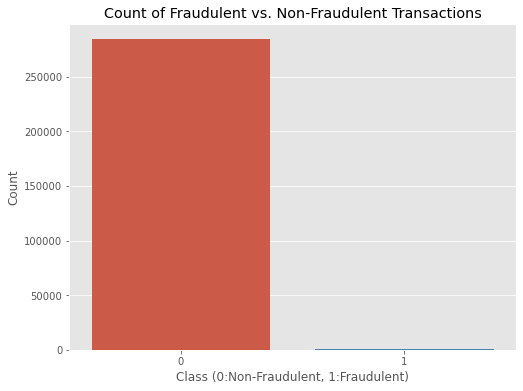

In [109]:
plt.figure(figsize=(8,6))
sns.barplot(x=counts.index, y=counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [110]:
corr = df.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000,1.174e-01,-1.059e-02,-4.196e-01,-1.053e-01,1.731e-01,-6.302e-02,8.471e-02,-3.695e-02,-8.660e-03,...,4.474e-02,1.441e-01,5.114e-02,-1.618e-02,-2.331e-01,-4.141e-02,-5.135e-03,-9.413e-03,-1.060e-02,-1.232e-02
V1,0.117,1.000e+00,4.697e-17,-1.424e-15,1.755e-17,6.391e-17,2.398e-16,1.992e-15,-9.491e-17,2.170e-16,...,-1.755e-16,7.477e-17,9.809e-16,7.354e-17,-9.805e-16,-8.622e-17,3.208e-17,9.821e-16,-2.277e-01,-1.013e-01
V2,-0.011,4.697e-17,1.000e+00,2.512e-16,-1.126e-16,-2.040e-16,5.025e-16,3.966e-16,-4.414e-17,-5.729e-17,...,8.444e-17,2.501e-16,1.060e-16,-8.142e-18,-4.262e-17,2.602e-16,-4.478e-16,-3.676e-16,-5.314e-01,9.129e-02
V3,-0.420,-1.424e-15,2.512e-16,1.000e+00,-3.417e-16,-1.437e-15,1.432e-15,2.169e-15,3.433e-16,-4.234e-16,...,-2.972e-17,4.648e-16,2.115e-17,-9.352e-17,4.771e-16,6.522e-16,6.240e-16,7.727e-16,-2.109e-01,-1.930e-01
V4,-0.105,1.755e-17,-1.126e-16,-3.417e-16,1.000e+00,-1.941e-15,-2.713e-16,1.556e-16,5.196e-16,3.860e-16,...,-9.977e-17,2.100e-16,6.003e-17,2.230e-16,5.395e-16,-6.180e-16,-6.403e-17,-5.864e-17,9.873e-02,1.334e-01
V5,0.173,6.391e-17,-2.040e-16,-1.437e-15,-1.941e-15,1.000e+00,7.926e-16,-4.210e-16,7.589e-16,4.205e-16,...,-1.369e-16,5.060e-16,1.638e-16,-9.286e-16,5.625e-16,9.145e-16,4.466e-16,-3.299e-16,-3.864e-01,-9.497e-02
V6,-0.063,2.398e-16,5.025e-16,1.432e-15,-2.713e-16,7.926e-16,1.000e+00,1.429e-16,-1.707e-16,1.114e-16,...,-1.576e-16,-3.363e-16,-7.232e-17,-1.262e-15,1.082e-15,-2.378e-16,-2.624e-16,4.813e-16,2.160e-01,-4.364e-02
V7,0.085,1.992e-15,3.966e-16,2.169e-15,1.556e-16,-4.210e-16,1.429e-16,1.000e+00,-8.692e-17,7.933e-16,...,1.939e-16,-1.058e-15,2.328e-16,-2.590e-17,1.174e-15,-7.335e-16,-5.887e-16,-6.837e-17,3.973e-01,-1.873e-01
V8,-0.037,-9.491e-17,-4.414e-17,3.433e-16,5.196e-16,7.589e-16,-1.707e-16,-8.692e-17,1.000e+00,2.901e-16,...,-2.412e-16,5.476e-16,3.897e-16,-1.803e-16,-1.391e-16,-1.210e-16,1.734e-16,-4.484e-16,-1.031e-01,1.988e-02
V9,-0.009,2.170e-16,-5.729e-17,-4.234e-16,3.860e-16,4.205e-16,1.114e-16,7.933e-16,2.901e-16,1.000e+00,...,4.578e-17,2.872e-17,5.929e-16,-2.346e-16,1.100e-15,-1.389e-15,-2.287e-16,9.147e-16,-4.425e-02,-9.773e-02


Text(0.5, 1.0, 'Heatmap of Correlation')

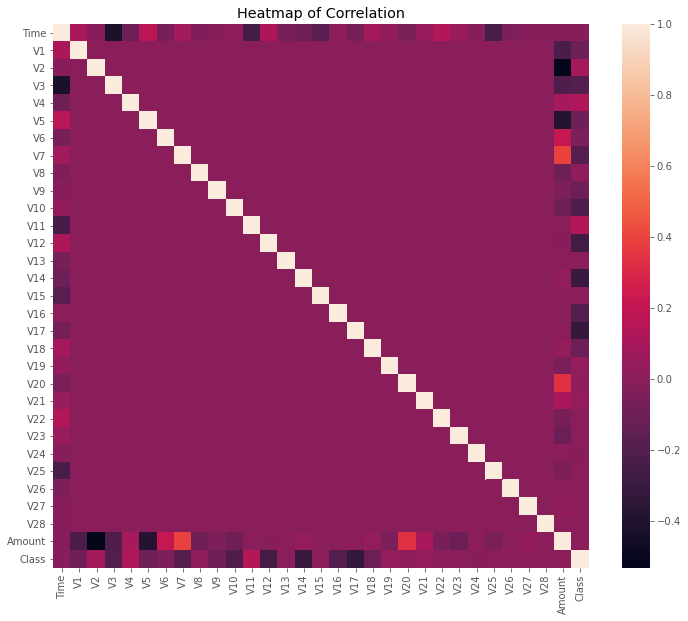

In [111]:
#heatmap
corr = df.corr()
plt.figure(figsize=(12,10))
heat = sns.heatmap(data=corr)
plt.title('Heatmap of Correlation')

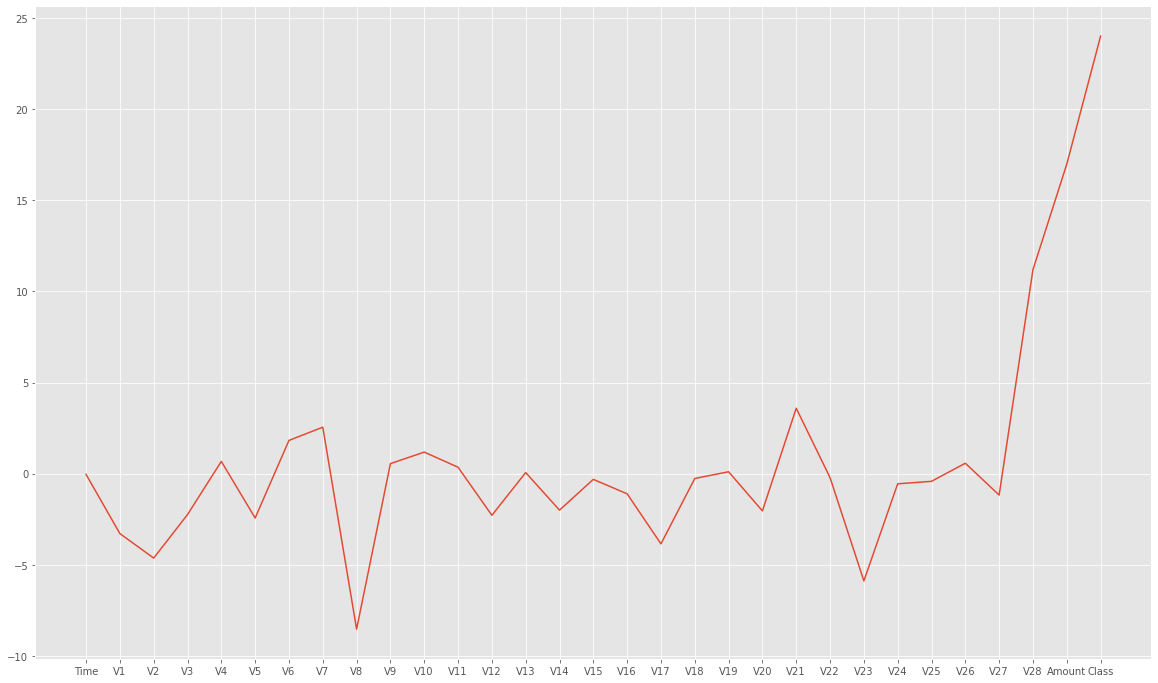

In [112]:
#skewness
skew_ = df.skew()
skew_
plt.figure(figsize=(20,12))
plt.plot(skew_)

**Scaling Amount and Time**

In [113]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler2 = StandardScaler()
#scaling the time column
scaled_time = scaler.fit_transform(df[['Time']])
flat_list1 = [item for sublist in scaled_time.tolist() for item in sublist]
scaled_time = pd.Series(flat_list1)

In [114]:
#scaling the amount column
scaled_amount = scaler2.fit_transform(df[['Amount']])
flat_list2 = [item for sublist in scaled_amount.tolist() for item in sublist]
scaled_amount = pd.Series(flat_list2)

In [115]:
#concatenating newly created columns with the original df
df = pd.concat([df, scaled_amount.rename('scaled_amount'), scaled_time.rename('scaled_time')], axis=1)
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_amount,scaled_time
150984,94306.0,1.795,0.247,0.878,3.789,-0.309,1.209,-1.148,0.361,0.822,...,0.302,0.679,-0.539,-0.140,0.012,-0.023,10.94,0,-0.309,-0.011
190323,128783.0,-0.212,0.855,-0.531,0.520,1.187,-0.767,1.463,-0.739,-0.702,...,-0.206,-0.259,-0.110,-0.033,-0.352,0.029,15.73,0,-0.290,0.715
173026,121331.0,0.071,-0.268,1.453,1.517,-1.600,0.828,-0.254,-0.799,-1.383,...,0.282,-0.279,1.042,-0.225,0.152,0.199,212.00,0,0.494,0.558
78172,57400.0,-3.213,2.339,-0.052,-0.946,-1.283,-0.789,-0.455,0.566,0.760,...,0.190,0.502,-0.376,-0.025,-2.971,-0.371,4.00,0,-0.337,-0.788
72654,54794.0,-2.646,0.841,-0.317,1.675,-1.400,0.117,0.119,1.204,-0.410,...,-0.370,0.137,-0.090,-0.224,0.347,-0.267,232.68,0,0.577,-0.843


In [116]:
#dropping old amount and time columns because now we have scaled amount and scaled data
df.drop(['Amount', 'Time'], axis=1, inplace=True)

**Splitting Data into Train and Test**

In [117]:
#manual train test data splitting using numpy's random.rand
mask = np.random.rand(len(df)) < 0.9
train = df[mask]
test = df[~mask]
print('Train Shape: {}\nTest Shape: {}'.format(train.shape, test.shape))

Train Shape: (256192, 31)
Test Shape: (28615, 31)


In [118]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

**Creating a subsample data set with balanced class distributions**

In [119]:
#how many random samples from normal transactions do we need?
no_of_frauds = train.Class.value_counts()[1]
print('There are {} fraudulent transactions in the train data.'.format(no_of_frauds))

There are 449 fraudulent transactions in the train data.


In [120]:
#randomly selecting 442 random non-fraudulent transactions
non_fraud = train[train['Class'] == 0]
fraud = train[train['Class'] == 1]

In [121]:
selected = non_fraud.sample(no_of_frauds)
selected.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
205693,2.076,-0.463,-0.715,-0.764,-0.478,-0.611,-0.520,-0.076,1.209,-0.249,...,-0.599,0.453,0.584,-6.715e-01,0.473,-0.066,-0.043,0,-0.325,1.070
245190,2.054,0.148,-2.132,0.172,0.813,-0.551,0.245,-0.244,0.246,-0.341,...,0.729,-0.196,-1.132,3.952e-01,-0.059,-0.005,-0.047,0,-0.261,1.482
162773,-0.851,1.472,-0.638,-0.584,-0.338,-1.147,0.288,0.706,-0.053,-0.535,...,-0.713,0.190,-0.146,-3.974e-01,0.160,0.104,0.024,0,-0.275,0.633
246013,-1.705,1.612,0.649,2.794,1.108,-0.307,0.895,0.195,-1.740,0.893,...,-0.448,0.064,-0.160,-9.983e-02,-0.365,-0.880,-0.356,0,-0.353,1.491
65823,-1.087,1.592,0.745,-0.367,0.391,-0.262,0.695,0.023,-0.200,0.552,...,-0.617,-0.129,-0.385,4.186e-04,0.035,-0.123,-0.305,0,-0.314,-0.837


In [122]:
#concatenating both into a subsample data set with equal class distribution
selected.reset_index(drop=True, inplace=True)
fraud.reset_index(drop=True, inplace=True)

In [123]:
subsample = pd.concat([selected, fraud])
len(subsample)

898

In [124]:
#shuffling our data set
subsample = subsample.sample(frac=1).reset_index(drop=True)
subsample.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-13.193,12.786,-9.907,3.320,-4.801,5.760,-18.751,-37.353,-0.392,-5.053,...,-8.887,5.304,-0.639,0.263,-0.109,1.270,0.939,1,-0.349,-0.560
1,-2.272,2.935,-4.871,2.419,-1.513,-0.481,-2.126,1.884,-1.297,-5.487,...,0.894,-0.032,0.323,-0.058,-0.412,0.574,0.176,1,0.350,0.716
2,-2.740,3.658,-4.111,5.340,-2.667,-0.093,-4.389,-0.280,-2.822,-4.466,...,-0.098,0.382,-0.155,-0.404,0.278,0.830,0.219,1,0.096,-1.135
3,-0.818,1.245,1.304,-0.189,0.182,-0.310,0.712,0.018,-0.089,0.449,...,-0.471,0.031,0.155,-0.222,0.054,0.306,-0.010,0,-0.314,-0.347
4,0.270,3.550,-5.810,5.809,1.539,-2.269,-0.824,0.351,-3.759,-4.592,...,-0.322,-0.550,-0.521,1.378,0.565,0.553,0.402,1,-0.351,-1.370
5,-0.330,1.387,1.170,2.844,0.920,0.051,1.113,-0.027,-1.480,0.583,...,0.613,-0.248,-0.030,-0.191,0.014,0.146,0.180,0,-0.308,1.248
6,0.754,2.380,-5.137,3.818,0.043,-1.285,-1.767,0.757,-1.766,-3.263,...,0.141,0.172,0.394,-0.445,-0.263,0.305,-0.044,1,-0.345,1.155
7,1.744,-0.719,-0.629,0.109,-0.529,-0.364,-0.263,-0.119,1.044,-0.275,...,-0.382,0.278,0.740,-0.510,-0.329,-0.018,-0.002,0,0.245,0.952
8,1.500,-0.868,-0.072,-1.395,-1.220,-1.164,-0.575,-0.262,-2.395,1.680,...,0.016,-0.064,0.520,0.606,-0.111,-0.010,-0.002,0,-0.293,-0.378
9,-6.713,3.921,-9.747,5.148,-5.152,-2.099,-5.938,3.579,-4.685,-8.538,...,-0.451,0.127,-0.339,0.394,1.075,1.650,-0.395,1,0.658,-0.201


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

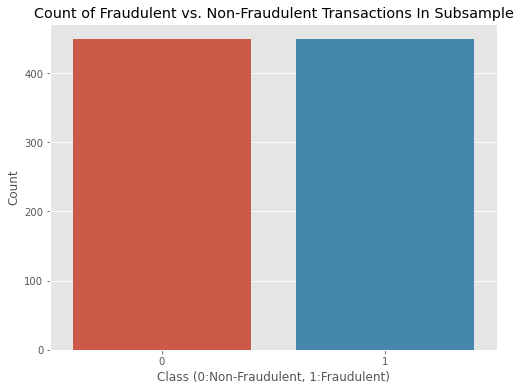

In [125]:
new_counts = subsample.Class.value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=new_counts.index, y=new_counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions In Subsample')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [126]:
#taking a look at correlations once more
corr = subsample.corr()
corr = corr[['Class']]
corr

,Class
V1,-0.433
V2,0.475
V3,-0.557
V4,0.715
V5,-0.372
V6,-0.392
V7,-0.467
V8,0.082
V9,-0.550
V10,-0.624


In [127]:
#negative correlations smaller than -0.5
corr[corr.Class < -0.5]

,Class
V3,-0.557
V9,-0.550
V10,-0.624
V12,-0.678
V14,-0.745
V16,-0.595
V17,-0.558


In [128]:
#positive correlations greater than 0.5
corr[corr.Class > 0.5]

,Class
V4,0.715
V11,0.677
Class,1.000


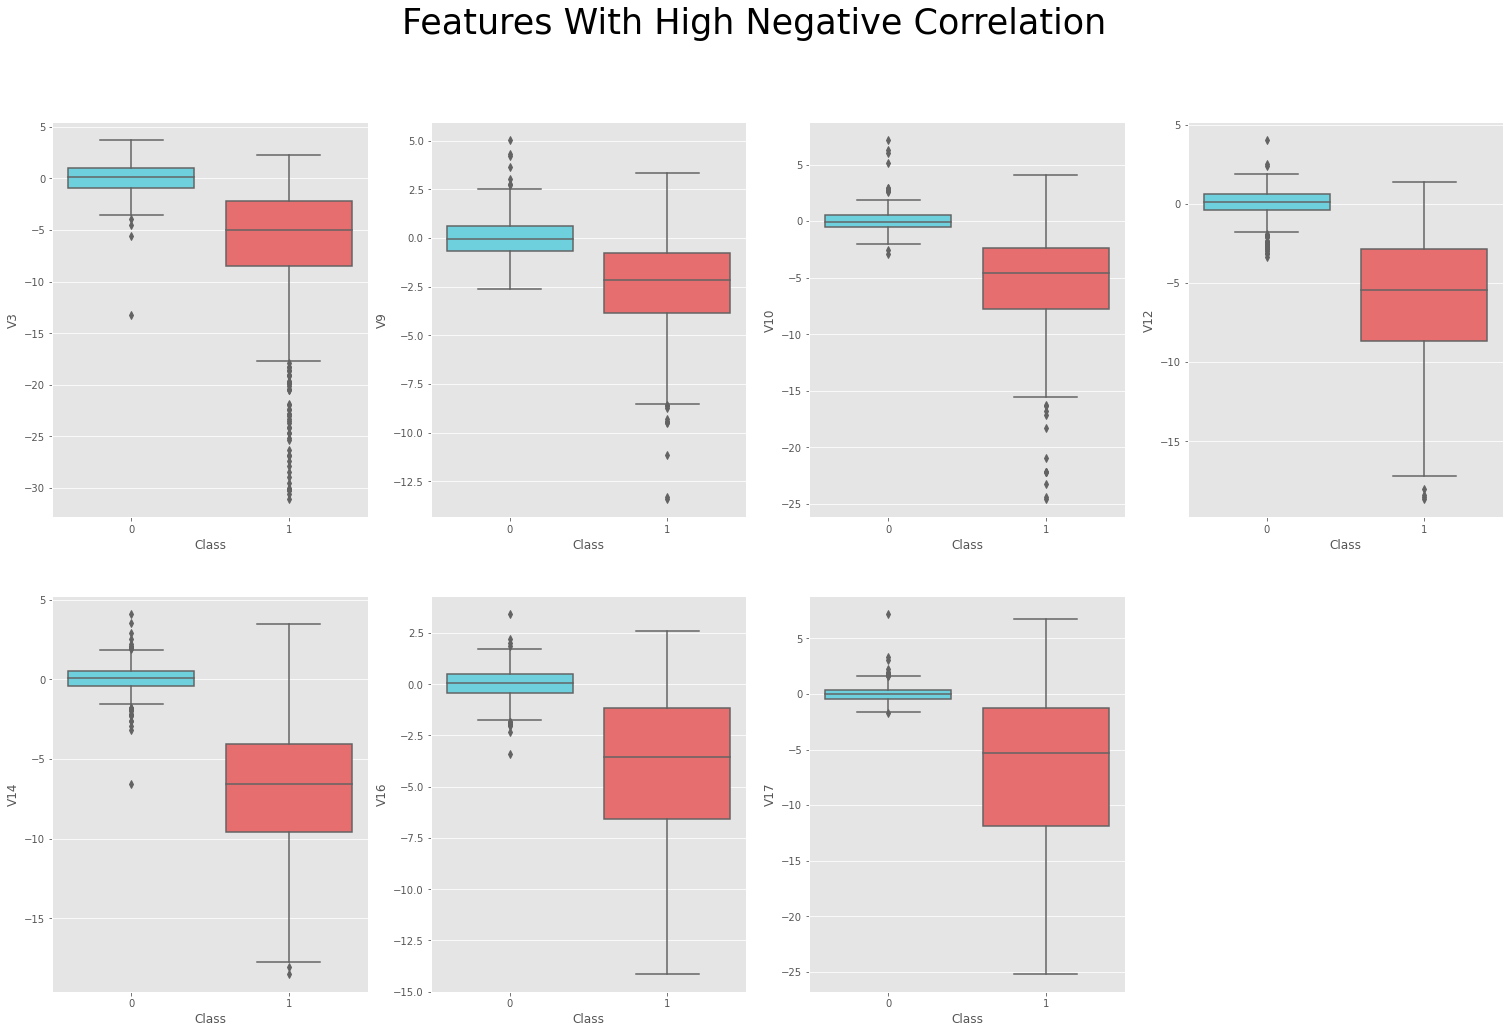

In [129]:
#visualizing the features w high negative correlation
f, axes = plt.subplots(nrows=2, ncols=4, figsize=(26,16))

newclrplt = ["#5bdef0", "#fa5a5a"]
sns.set_palette(sns.color_palette(newclrplt))
f.suptitle('Features With High Negative Correlation', size=35)
sns.boxplot(x="Class", y="V3", data=subsample, ax=axes[0,0])
sns.boxplot(x="Class", y="V9", data=subsample, ax=axes[0,1])
sns.boxplot(x="Class", y="V10", data=subsample, ax=axes[0,2])
sns.boxplot(x="Class", y="V12", data=subsample, ax=axes[0,3])
sns.boxplot(x="Class", y="V14", data=subsample, ax=axes[1,0])
sns.boxplot(x="Class", y="V16", data=subsample, ax=axes[1,1])
sns.boxplot(x="Class", y="V17", data=subsample, ax=axes[1,2])
f.delaxes(axes[1,3])

<AxesSubplot:xlabel='Class', ylabel='V11'>

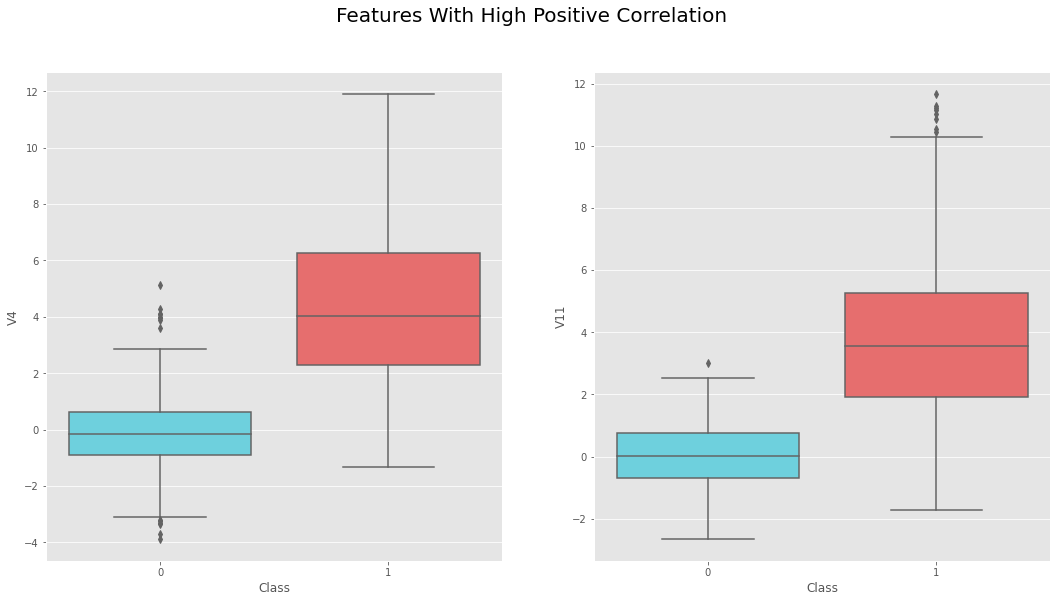

In [130]:
#visualizing the features w high positive correlation
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,9))

newclrplt = ["#5bdef0", "#fa5a5a"]
sns.set_palette(sns.color_palette(newclrplt))
f.suptitle('Features With High Positive Correlation', size=20)
sns.boxplot(x="Class", y="V4", data=subsample, ax=axes[0])
sns.boxplot(x="Class", y="V11", data=subsample, ax=axes[1])

**Extreme Outlier Removal**

In [131]:
#Only removing extreme outliers
Q1 = subsample.quantile(0.25)
Q3 = subsample.quantile(0.75)
IQR = Q3 - Q1

df2 = subsample[~((subsample < (Q1 - 2.5 * IQR)) |(subsample > (Q3 + 2.5 * IQR))).any(axis=1)]

In [132]:
len_after = len(df2)
len_before = len(subsample)
len_difference = len(subsample) - len(df2)
print('We reduced our data size from {} transactions by {} transactions to {} transactions.'.format(len_before, len_difference, len_after))

We reduced our data size from 898 transactions by 263 transactions to 635 transactions.


**Dimensionality Reduction**

In [133]:
from sklearn.manifold import TSNE

X = df2.drop('Class', axis=1)
y = df2['Class']

In [134]:
#t-SNE
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)

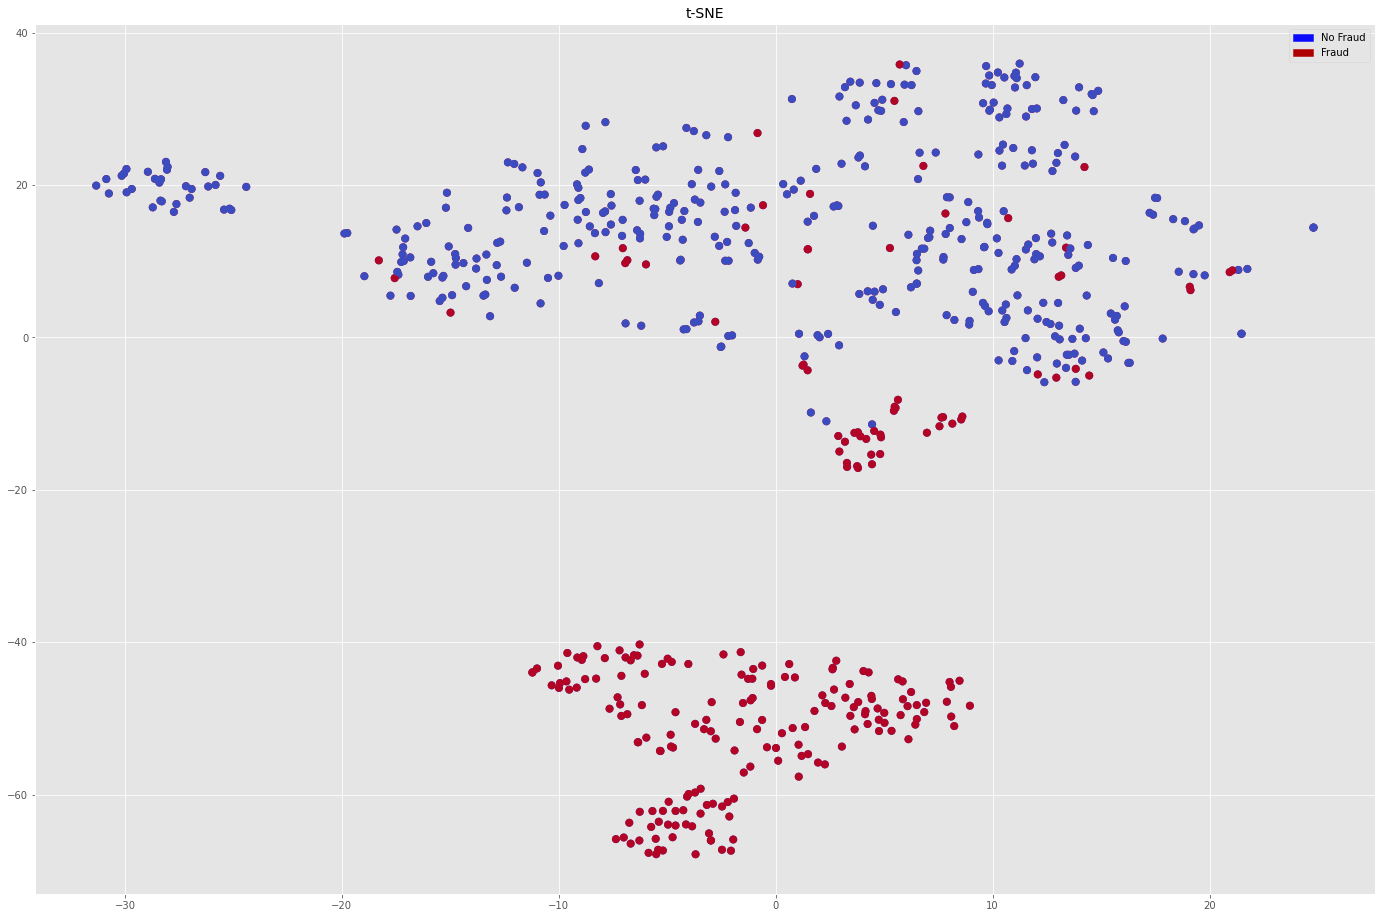

In [135]:
# t-SNE scatter plot
import matplotlib.patches as mpatches

f, ax = plt.subplots(figsize=(24,16))


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax.set_title('t-SNE', fontsize=14)

ax.grid(True)

ax.legend(handles=[blue_patch, red_patch])

**Classification Algorithms**

In [136]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [137]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [138]:
X_train = X_train.values
X_validation = X_test.values
y_train = y_train.values
y_validation = y_test.values

In [139]:
print('X_shapes:\n', 'X_train:', 'X_validation:\n', X_train.shape, X_validation.shape, '\n')
print('Y_shapes:\n', 'Y_train:', 'Y_validation:\n', y_train.shape, y_validation.shape)

X_shapes:
 X_train: X_validation:
 (508, 30) (127, 30) 

Y_shapes:
 Y_train: Y_validation:
 (508,) (127,)


In [140]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [141]:
##Spot-Checking Algorithms

models = []

models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('XGB', XGBClassifier(eval_metric='mlogloss')))
models.append(('RF', RandomForestClassifier()))

#testing models

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.975250 (0.024976)
LDA: 0.973833 (0.021987)
KNN: 0.953324 (0.034785)
CART: 0.905540 (0.037862)
SVM: 0.972442 (0.025344)
XGB: 0.980276 (0.019290)
RF: 0.970651 (0.024727)


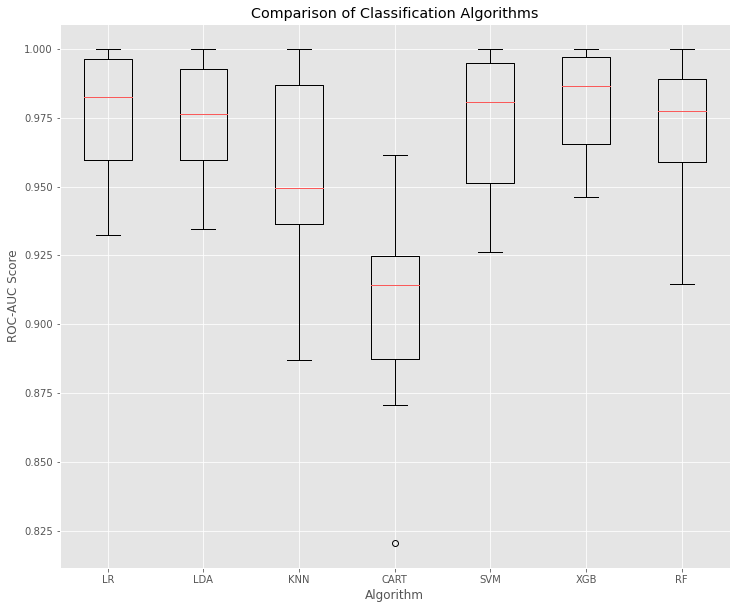

In [142]:
#Compare Algorithms

fig = plt.figure(figsize=(12,10))
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('ROC-AUC Score')
plt.boxplot(results)
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.show()

In [143]:
#visualizing RF
model = RandomForestClassifier(n_estimators=10)

# Train
model.fit(X_train, y_train)
# Extract single tree
estimator = model.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = X.columns.tolist(),
                class_names = ['0',' 1'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

In [144]:
y_pred=model.predict(X_validation)

In [145]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_validation, y_pred))

Accuracy: 0.9133858267716536
